In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os

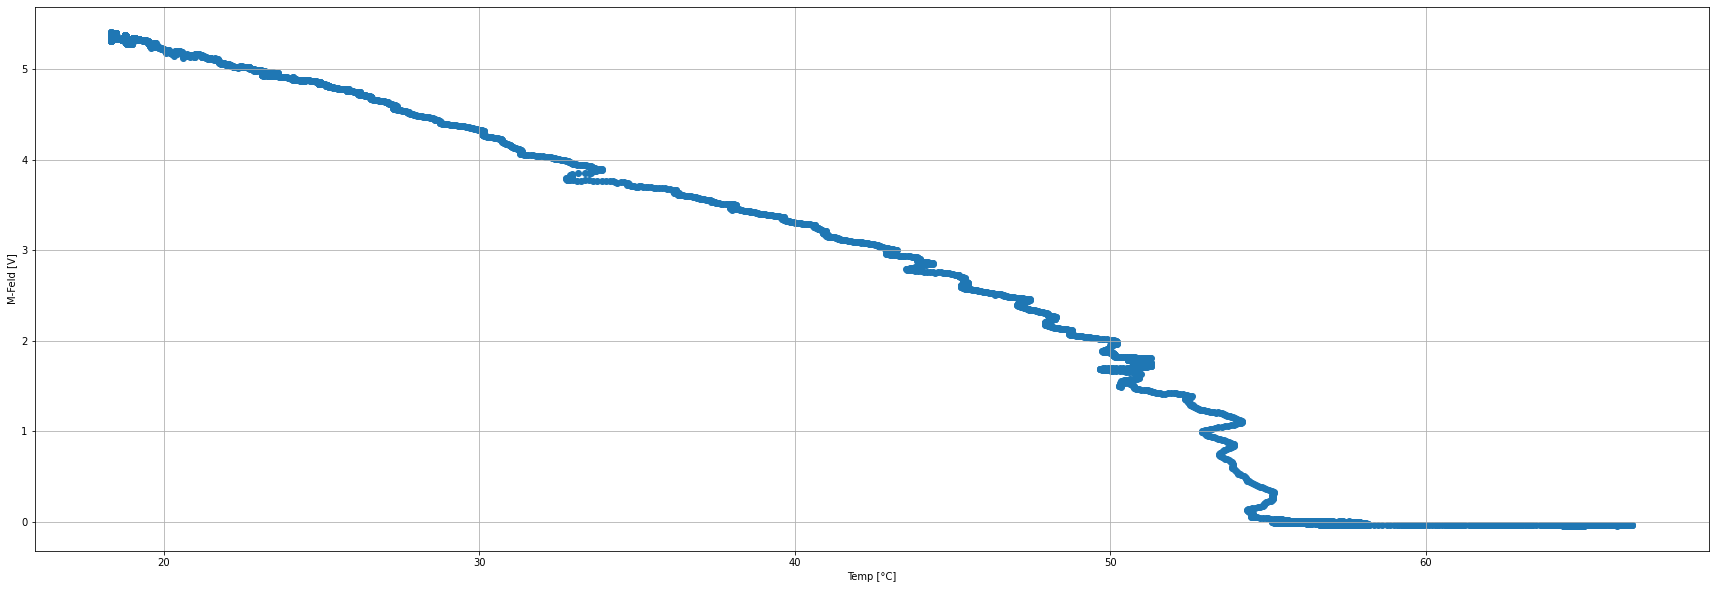

In [3]:
for name in os.listdir("Daten"):
    plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[0])) 
        yv.append(-float(vals[1]))
    plt.scatter(xv,yv)
    plt.xlabel("Temp [°C]")
    plt.ylabel("M-Feld [V]")
    file.close()
    plt.grid(True)

In [6]:
x_ys0 = [x for i,x in enumerate(xv) if yv[i] < 0]

In [9]:
min(x_ys0)

55.1403147